# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## Odalys Barrionuevo
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

In [1]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### <span style="color:green"> Commento: </span>
<span style="color:green"> Lo scopo di questa esercitazone è stabilire quanto dovrebbe costare un'$opzione\  europea*$ con i seguenti dati: S(0) = 100 (prezzo al tempo t=0), data di scadenza T = 1, K = 100 (prezzo pattuito), tasso d'interesse r = 0.1 (privo di rischi) e volatilità $\sigma = 0.25$. Cioè è necessario determinare quanto potrebbe costare un prodotto ad un certo tempo t (S(t)) partendo dal prezzo corrente S(0). </span>

<span style="color:green"> $*$ un'$opzione\ europea$ è un tipo di contratto tra due parti in cui il writer garantisce al holder il diritto di comprare o vendere qualcosa (dipendendo da cosa gli conviene) in cambio di una ricompensa.
</span>

<span style="color:green"> All'holder converrà comprare se S(t) > K (Call) altrimenti gli convrrà vendere (Put). Il guadagno della Call/Put viene scontato del tasso di interesse che la banca darebbe all'holder se depositasse quella quantità (al tempo T) invece che darla al venditore dell'opzione. </span>

<span style="color:green"> La stima della Call/Put è stata fatta con un metodo Monte Carlo in due modi (sfruttando anche la media a blocchi): il primo è un'approccio diretto a uno step (sotto in viola), il secondo modo consiste nel dividere l'intervallo in $10^2$ parti (sotto in verde). Entrambe le medie progressive Call e Put (con i rispettivi errori), in funzione del tempo (numero di step totali), vengono confrontati con la soluzione analitica Black-Scholes (sotto in rosso).</span>

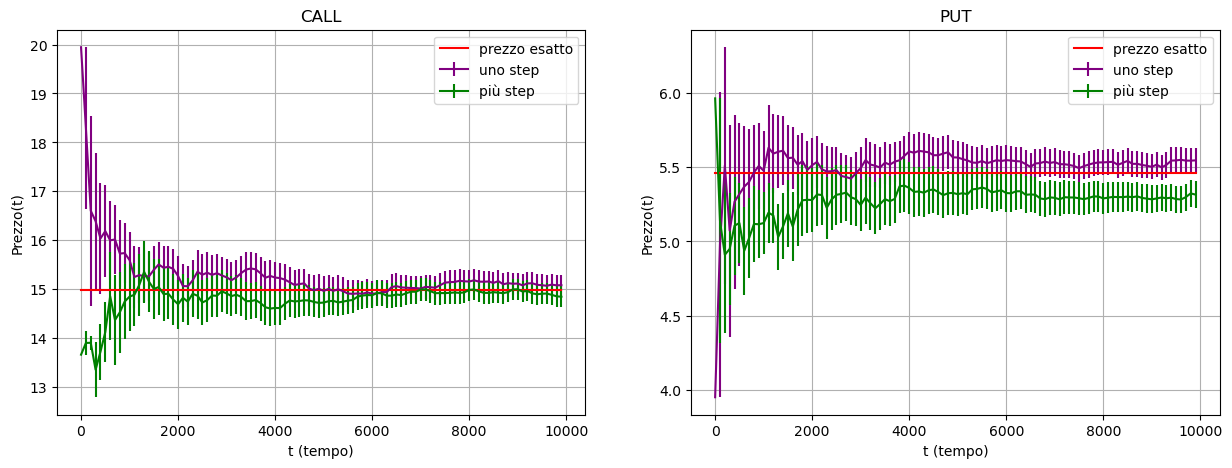

In [3]:
import matplotlib #per grafici
import matplotlib.pyplot as plt
import numpy as np #per avere i vettori
import math
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

M = 10000
N = 100
L = M/N
x = np.arange(N)
x = x*L
Call = np.array([
    call
    for t in x
])
Put = np.array([
    put
    for t in x
])

#plt.figure(1)
C, errorC, C_step, errorC_step = np.loadtxt("Call.txt", usecols = (0,1,2,3), delimiter = ' ', unpack = 'true')
axes[0].errorbar(x, C, yerr=errorC, color = 'purple', label = "uno step")
axes[0].errorbar(x, C_step, yerr=errorC_step, color = 'green', label = "più step")
axes[0].plot(x, Call, color = 'red', label = "prezzo esatto")
axes[0].set_title("CALL")
axes[0].set_xlabel('t (tempo)')
axes[0].set_ylabel('Prezzo(t)')
axes[0].grid(True)
axes[0].legend()

#plt.figure(2)
P, errorP, P_step, errorP_step = np.loadtxt("Put.txt", usecols = (0,1,2,3), delimiter = ' ', unpack = 'true')
axes[1].errorbar(x, P, yerr=errorP, color = 'purple', label = "uno step")
axes[1].errorbar(x, P_step, yerr=errorP_step, color = 'green', label = "più step")
axes[1].plot(x, Put, color = 'red', label = "prezzo esatto")
axes[1].set_title("PUT")
axes[1].set_xlabel('t (tempo)')
axes[1].set_ylabel('Prezzo(t)')
axes[1].grid(True)
axes[1].legend()

plt.show()